# Statistics with Python!

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [8]:
allstates = pd.read_csv('2008_all_states.csv')
allstates.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [10]:
swingstates = pd.read_csv('2008_swing_states.csv', header=0)
swingstates.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


## Graphical EDA

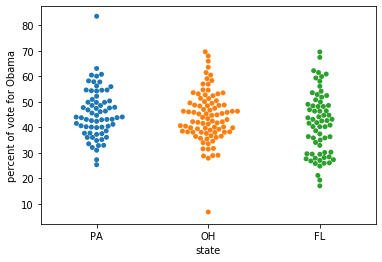

In [20]:
# Swarm Plots
_ = sns.swarmplot(x='state', y='dem_share', data=swingstates)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Empirical Cumulative Distribution

In [22]:
x = np.sort(swingstates['dem_share'])

In [23]:
y = np.arange(1, len(x)+1 / len(x))

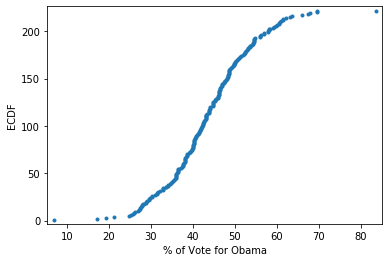

In [27]:
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

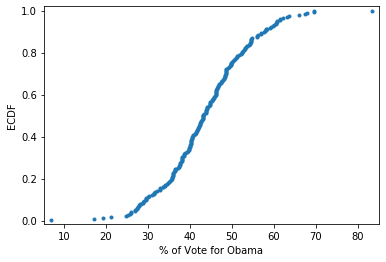

In [30]:
# using the function to calculate x and y - will be done often
x_vers, y_vers = ecdf(swingstates['dem_share'])
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [33]:
x_dem, y_dem = ecdf(swingstates['dem_votes'])
x_rep, y_rep = ecdf(swingstates['rep_votes'])
#x_other, y_other = ecdf(swingstates['other_votes'])

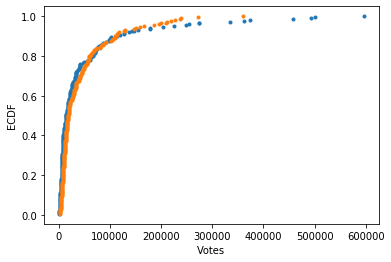

In [35]:
_ = plt.plot(x_dem, y_dem, marker = '.', linestyle = 'none')
_ = plt.plot(x_rep, y_rep, marker = '.', linestyle = 'none')

_ = plt.xlabel('Votes')
_ = plt.ylabel('ECDF')

# Quantitative EDA